# Objective : To predict the possibilty of booking

In [47]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("data/hotel_bookings.csv")
df.shape

(119390, 32)

In [49]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<AxesSubplot:xlabel='hotel', ylabel='count'>

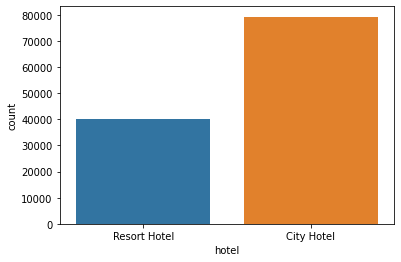

In [50]:
sb.countplot(df['hotel'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

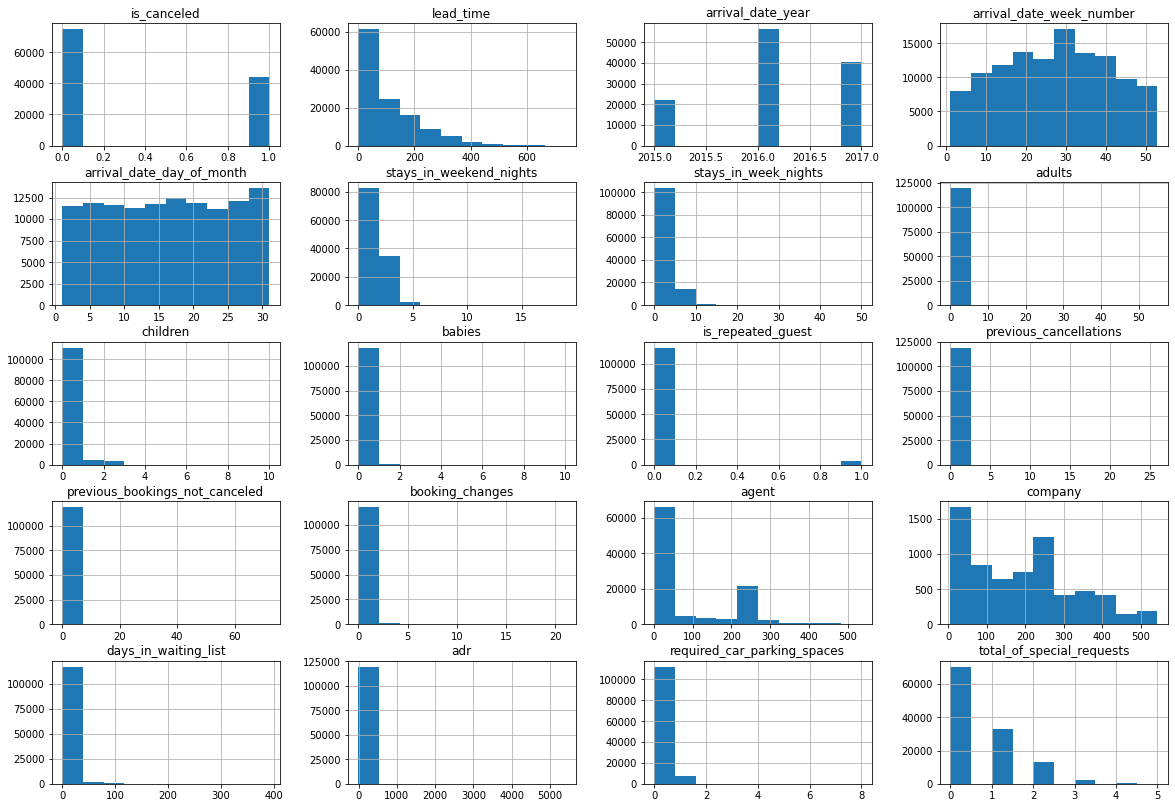

In [53]:
df.hist(figsize=(20,14))
plt.show()

In [54]:
# sb.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [55]:
df.drop(columns=['company', 'country', 'agent'], inplace=True)

In [56]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [57]:
df.dropna(inplace=True)

In [58]:
obj_type = []
for i in df:
    if df[i].dtype == 'object':
        obj_type.append(i)
        print(f"{i} == {df[i].unique()} \n ")

hotel == ['Resort Hotel' 'City Hotel'] 
 
arrival_date_month == ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June'] 
 
meal == ['BB' 'FB' 'HB' 'SC' 'Undefined'] 
 
market_segment == ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Aviation'] 
 
distribution_channel == ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS'] 
 
reserved_room_type == ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B'] 
 
assigned_room_type == ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K'] 
 
deposit_type == ['No Deposit' 'Refundable' 'Non Refund'] 
 
customer_type == ['Transient' 'Contract' 'Transient-Party' 'Group'] 
 
reservation_status == ['Check-Out' 'Canceled' 'No-Show'] 
 
reservation_status_date == ['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-15' '2015-07-16' '2015-05-29' '2015-05-19'
 '2015-06-19' '2015-05-23' '2015

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in obj_type:
    df[i] = le.fit_transform(df[i])

In [60]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,121
1,1,0,737,2015,5,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,121
2,1,0,7,2015,5,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,122
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,123


In [61]:
feature = df.drop('hotel', axis = 1)
label = df['hotel']

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state=0, test_size=0.2)
X_train.shape, X_test.shape

((95508, 28), (23878, 28))

In [63]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def evaluation_metric(y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Classification Report is:\n",classification_report(y_test,y_pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print(f"Accuracy Score of Logistic Regression is : {accuracy}")

## Logistic Regression

In [64]:
%%time
from sklearn.linear_model import LogisticRegression
l_reg = LogisticRegression()
l_reg.fit(X_train, y_train)
y_pred = l_reg.predict(X_test)
evaluation_metric(y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83     15891
           1       0.70      0.45      0.55      7987

    accuracy                           0.75     23878
   macro avg       0.73      0.68      0.69     23878
weighted avg       0.74      0.75      0.74     23878

Confusion Matrix:
 [[14387  1504]
 [ 4408  3579]]
Accuracy Score of Logistic Regression is : 0.7524080743780887
Wall time: 1.89 s


In [65]:
%%time
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
evaluation_metric(y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     15891
           1       0.86      0.77      0.81      7987

    accuracy                           0.88     23878
   macro avg       0.88      0.85      0.86     23878
weighted avg       0.88      0.88      0.88     23878

Confusion Matrix:
 [[14897   994]
 [ 1826  6161]]
Accuracy Score of Logistic Regression is : 0.8818996565876539
Wall time: 1min 48s


In [66]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
evaluation_metric(y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90     15891
           1       0.85      0.69      0.76      7987

    accuracy                           0.86     23878
   macro avg       0.85      0.82      0.83     23878
weighted avg       0.86      0.86      0.85     23878

Confusion Matrix:
 [[14919   972]
 [ 2448  5539]]
Accuracy Score of Logistic Regression is : 0.8567719239467292
Wall time: 1.15 s


In [67]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
evaluation_metric(y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     15891
           1       0.96      0.94      0.95      7987

    accuracy                           0.97     23878
   macro avg       0.96      0.96      0.96     23878
weighted avg       0.97      0.97      0.97     23878

Confusion Matrix:
 [[15565   326]
 [  501  7486]]
Accuracy Score of Logistic Regression is : 0.9653656085099255
Wall time: 37.1 s


In [68]:
%%time
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train, y_train)
y_pred = adb.predict(X_test)
evaluation_metric(y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.88      0.94      0.90     15891
           1       0.85      0.73      0.79      7987

    accuracy                           0.87     23878
   macro avg       0.86      0.84      0.85     23878
weighted avg       0.87      0.87      0.87     23878

Confusion Matrix:
 [[14867  1024]
 [ 2121  5866]]
Accuracy Score of Logistic Regression is : 0.868288801407153
Wall time: 13.2 s


In [69]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
evaluation_metric(y_pred)

Classification Report is:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93     15891
           1       0.90      0.80      0.85      7987

    accuracy                           0.90     23878
   macro avg       0.90      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878

Confusion Matrix:
 [[15217   674]
 [ 1601  6386]]
Accuracy Score of Logistic Regression is : 0.9047240137364938
Wall time: 47.4 s
